# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-epsilon.new.420.422.429.fix.438.441'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See', 'Solomon Islands'],
 3: ['Timor-Leste', 'Saint Kitts and Nevis', 'Laos'],
 4: ['Brunei', 'Dominica', 'Fiji'],
 5: ['Grenada', 'Tanzania', 'Saint Lucia', 'Equatorial Guinea'],
 6: ['Mauritius', 'Antigua and Barbuda', 'Cambodia'],
 7: ['Saint Vincent and the Grenadines'],
 8: ['Gambia', 'Monaco', 'Bahamas', 'Kyrgyzstan', 'Sao Tome and Principe',
     'Trinidad and Tobago', 'Liechtenstein', 'Seychelles', 'Madagascar',
     'Vietnam', 'Northern Mariana Islands'],
 9: ['Republic of the Congo', 'Zimbabwe', 'Australia', 'Kazakhstan', 'Oman',
     'Djibouti', 'Ghana', 'Zambia', 'Suriname', 'Lesotho', 'Uzbekistan',
     'Malawi', 'Barbados', 'Bhutan', 'Bolivia'],
 10: ['Benin', 'Venezuela', 'Burundi', 'Philippines', 'Honduras', 'Namibia',
      'Botswana', 'Swaziland', 'Mongolia', 'Belize', 'Virgin Islands, U.S.',
      'Chile', 'Guyana', 'Ethiopia', 'Mozambique', 'Comoros', 'Maldives',
      'Kenya', 'Guam', 'Kuwait', 'South Sudan', 'Angola', 'Jamaica',
      'Papua New Guinea

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

13

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Canada', 'Denmark', 'Belgium', 'Austria', 'Portugal', 'Sweden',
      'Germany', 'Finland', 'France'],
 17: ['Romania', 'United Kingdom', 'Netherlands'],
 18: ['Norway']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Norway  0th    Past  15Mar2020  24Mar2020     5311916
        1st    Past  25Mar2020  02Apr2020     5311916
        2nd    Past  03Apr2020  20Apr2020     5311916
        3rd    Past  21Apr2020  02Jun2020     5311916
        4th    Past  03Jun2020  09Aug2020     5311916
        5th    Past  10Aug2020  04Sep2020     5311916
        6th    Past  05Sep2020  20Sep2020     5311916
        7th    Past  21Sep2020  05Oct2020     5311916
        8th    Past  06Oct2020  20Oct2020     5311916
        9th    Past  21Oct2020  28Oct2020     5311916
        10th   Past  29Oct2020  03Nov2020     5311916
        11th   Past  04Nov2020  09Nov2020     5311916
        12th   Past  10Nov2020  15Nov2020     5311916
        13th   Past  16Nov2020  22Nov2020     5311916
        14th   Past  23Nov2020  29Nov2020     5311916
        15th   Past  30Nov2020  06Dec2020     5311916
        16th   Past  07Dec2020  13Dec2020     5311916
        17th   Past  14Dec2020  20Dec2020     5311916

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DNK,  7th phase (13Oct2020 - 22Oct2020): finished  362 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 26May2020): finished  357 trials in 0 min 10 sec

	NLD, 12th phase (14Nov2020 - 19Nov2020): finished  364 trials in 0 min 10 sec

	CAN,  4th phase (03Jun2020 - 22Jul2020): finished  349 trials in 0 min 10 sec

	PRT, 12th phase (13Nov2020 - 22Nov2020): finished  349 trials in 0 min 10 sec

	CAN,  3rd phase (12May2020 - 02Jun2020): finished  342 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  339 trials in 0 min 10 sec

	SWE,  5th phase (05Aug2020 - 22Sep2020): finished  334 trials in 0 min 10 sec

	GBR, 11th phase (04Nov2020 - 10Nov2020): finished  327 trials in 0 min 10 sec

	NLD,  9th phase (19Oct2020 - 28Oct2020): finished  323 trials in 0 min 10 sec

	ROU, 16th phase (14Dec2020 - 20Dec2020): finished  324 trials in 0 min 10 sec

	GBR, 16th phase (09Dec2020 - 20Dec2020): finished  323 trials in 0 min 10 sec

	FIN,  5th phase (19Aug2020 - 20Sep2020): finished  319 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 15Sep2020): finished  317 trials in 0 min 10 sec

	AUT, 11th phase (10Nov2020 - 19Nov2020): finished  324 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 08Apr2020): finished  314 trials in 0 min 10 sec

	AUT, 12th phase (20Nov2020 - 30Nov2020): finished  327 trials in 0 min 10 sec

	FIN,  9th phase (24Oct2020 - 02Nov2020): finished  325 trials in 0 min 10 sec

	NOR, 14th phase (23Nov2020 - 29Nov2020): finished  327 trials in 0 min 10 sec

	NOR,  0th phase (15Mar2020 - 24Mar2020): finished  328 trials in 0 min 10 sec

	ROU,  7th phase (12Oct2020 - 20Oct2020): finished  285 trials in 0 min 10 sec

	FRA,  7th phase (01Oct2020 - 08Oct2020): finished  277 trials in 0 min 10 sec

	FRA, 14th phase (27Nov2020 - 08Dec2020): finished  278 trials in 0 min 10 sec

	ROU,  9th phase (29Oct2020 - 04Nov2020): finished  293 trials in 0 min 10 sec

	AUT,  6th phase (23Sep2020 - 04Oct2020): finished  322 trials in 0 min 10 sec

	FRA, 11th phase (01Nov2020 - 10Nov2020): finished  322 trials in 0 min 10 sec

	CAN,  9th phase (25Oct2020 - 04Nov2020): finished  322 trials in 0 min 10 sec

	DEU,  9th phase (27Oct2020 - 01Nov2020): finished  326 trials in 0 min 10 sec

	GBR, 12th phase (11Nov2020 - 16Nov2020): finished  324 trials in 0 min 10 sec

	ROU,  3rd phase (31Jul2020 - 19Aug2020): finished  318 trials in 0 min 10 sec

	CAN, 12th phase (22Nov2020 - 28Nov2020): finished  320 trials in 0 min 10 sec

	DEU,  3rd phase (23Apr2020 - 17Jun2020): finished  307 trials in 0 min 10 sec

	ROU,  5th phase (10Sep2020 - 29Sep2020): finished  298 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  306 trials in 0 min 10 sec

	ROU, 14th phase (02Dec2020 - 07Dec2020): finished  309 trials in 0 min 10 sec

	BEL, 12th phase (09Nov2020 - 15Nov2020): finished  311 trials in 0 min 10 sec

	BEL,  8th phase (06Oct2020 - 11Oct2020): finished  308 trials in 0 min 10 sec

	BEL,  1st phase (02Apr2020 - 14Apr2020): finished  303 trials in 0 min 10 sec

	ROU, 13th phase (25Nov2020 - 01Dec2020): finished  312 trials in 0 min 10 sec

	PRT,  3rd phase (02Jun2020 - 02Jul2020): finished  303 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 27Sep2020): finished  306 trials in 0 min 10 sec

	NLD,  7th phase (02Oct2020 - 08Oct2020): finished  311 trials in 0 min 10 sec

	CAN,  1st phase (09Apr2020 - 24Apr2020): finished  309 trials in 0 min 10 sec

	CAN,  8th phase (12Oct2020 - 24Oct2020): finished  308 trials in 0 min 10 sec

	FRA,  3rd phase (31Jul2020 - 26Aug2020): finished  307 trials in 0 min 10 sec

	NLD, 14th phase (27Nov2020 - 03Dec2020): finished  310 trials in 0 min 10 sec

	NOR, 12th phase (10Nov2020 - 15Nov2020): finished  307 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  297 trials in 0 min 10 sec

	NOR,  5th phase (10Aug2020 - 04Sep2020): finished  303 trials in 0 min 10 sec

	NOR,  2nd phase (03Apr2020 - 20Apr2020): finished  300 trials in 0 min 10 sec

	NOR,  4th phase (03Jun2020 - 09Aug2020): finished  287 trials in 0 min 10 sec

	PRT,  5th phase (12Aug2020 - 11Sep2020): finished  299 trials in 0 min 10 sec

	SWE,  7th phase (15Oct2020 - 27Oct2020): finished  310 trials in 0 min 10 sec

	DNK,  2nd phase (20May2020 - 06Aug2020): finished  280 trials in 0 min 10 sec

	PRT,  4th phase (03Jul2020 - 11Aug2020): finished  295 trials in 0 min 10 sec

	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  291 trials in 0 min 10 sec

	GBR,  2nd phase (30Apr2020 - 22May2020): finished  289 trials in 0 min 10 sec

	NLD, 13th phase (20Nov2020 - 26Nov2020): finished  297 trials in 0 min 10 sec

	NLD, 11th phase (08Nov2020 - 13Nov2020): finished  297 trials in 0 min 10 sec

	AUT, 13th phase (01Dec2020 - 06Dec2020): finished  300 trials in 0 min 10 sec

	AUT,  4th phase (19Aug2020 - 09Sep2020): finished  310 trials in 0 min 10 sec

	FIN, 13th phase (26Nov2020 - 01Dec2020): finished  317 trials in 0 min 10 sec

	GBR,  6th phase (24Sep2020 - 04Oct2020): finished  311 trials in 0 min 10 sec

	FIN, 10th phase (03Nov2020 - 11Nov2020): finished  313 trials in 0 min 10 sec

	FIN,  8th phase (14Oct2020 - 23Oct2020): finished  309 trials in 0 min 10 sec

	NLD,  1st phase (02Apr2020 - 17Apr2020): finished  307 trials in 0 min 10 sec

	DEU,  6th phase (16Sep2020 - 07Oct2020): finished  289 trials in 0 min 10 sec

	AUT,  7th phase (05Oct2020 - 13Oct2020): finished  293 trials in 0 min 10 sec

	SWE,  3rd phase (07Jun2020 - 23Jun2020): finished  275 trials in 0 min 10 sec

	FRA, 13th phase (17Nov2020 - 26Nov2020): finished  278 trials in 0 min 10 sec

	ROU, 10th phase (05Nov2020 - 11Nov2020): finished  289 trials in 0 min 10 sec

	PRT,  7th phase (01Oct2020 - 13Oct2020): finished  282 trials in 0 min 10 sec

	FRA,  1st phase (02Apr2020 - 27Apr2020): finished  304 trials in 0 min 10 sec

	ROU,  6th phase (30Sep2020 - 11Oct2020): finished  309 trials in 0 min 10 sec

	FIN,  0th phase (17Mar2020 - 04Apr2020): finished  304 trials in 0 min 10 sec

	CAN, 13th phase (29Nov2020 - 05Dec2020): finished  313 trials in 0 min 10 sec

	PRT,  9th phase (22Oct2020 - 27Oct2020): finished  310 trials in 0 min 10 sec

	AUT,  8th phase (14Oct2020 - 20Oct2020): finished  308 trials in 0 min 10 sec

	CAN,  7th phase (29Sep2020 - 11Oct2020): finished  304 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 08Apr2020): finished  296 trials in 0 min 10 sec

	CAN, 14th phase (06Dec2020 - 12Dec2020): finished  295 trials in 0 min 10 sec

	DEU,  7th phase (08Oct2020 - 19Oct2020): finished  292 trials in 0 min 10 sec

	NOR,  1st phase (25Mar2020 - 02Apr2020): finished  297 trials in 0 min 10 sec

	PRT, 10th phase (28Oct2020 - 02Nov2020): finished  299 trials in 0 min 10 sec

	NOR,  3rd phase (21Apr2020 - 02Jun2020): finished  298 trials in 0 min 10 sec

	NLD,  8th phase (09Oct2020 - 18Oct2020): finished  311 trials in 0 min 10 sec

	DNK, 15th phase (10Dec2020 - 20Dec2020): finished  312 trials in 0 min 10 sec

	NLD,  4th phase (11Aug2020 - 09Sep2020): finished  306 trials in 0 min 10 sec

	BEL, 14th phase (26Nov2020 - 07Dec2020): finished  310 trials in 0 min 10 sec

	CAN,  5th phase (23Jul2020 - 06Sep2020): finished  300 trials in 0 min 10 sec

	SWE,  4th phase (24Jun2020 - 04Aug2020): finished  299 trials in 0 min 10 sec

	FIN,  6th phase (21Sep2020 - 04Oct2020): finished  311 trials in 0 min 10 sec

	SWE,  6th phase (23Sep2020 - 14Oct2020): finished  307 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  307 trials in 0 min 10 sec

	FRA, 10th phase (22Oct2020 - 31Oct2020): finished  311 trials in 0 min 10 sec

	BEL,  9th phase (12Oct2020 - 21Oct2020): finished  311 trials in 0 min 10 sec

	PRT,  2nd phase (23Apr2020 - 01Jun2020): finished  292 trials in 0 min 10 sec

	NLD,  3rd phase (27May2020 - 10Aug2020): finished  284 trials in 0 min 10 sec

	PRT,  8th phase (14Oct2020 - 21Oct2020): finished  302 trials in 0 min 10 sec

	NOR, 16th phase (07Dec2020 - 13Dec2020): finished  299 trials in 0 min 10 sec

	NOR, 11th phase (04Nov2020 - 09Nov2020): finished  299 trials in 0 min 10 sec

	FIN,  4th phase (27May2020 - 18Aug2020): finished  280 trials in 0 min 10 sec

	BEL,  3rd phase (10May2020 - 27Jul2020): finished  281 trials in 0 min 10 sec

	BEL,  2nd phase (15Apr2020 - 09May2020): finished  297 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  296 trials in 0 min 10 sec

	GBR, 15th phase (02Dec2020 - 08Dec2020): finished  298 trials in 0 min 10 sec

	CAN,  2nd phase (25Apr2020 - 11May2020): finished  293 trials in 0 min 10 sec

	ROU, 15th phase (08Dec2020 - 13Dec2020): finished  297 trials in 0 min 10 sec

	ROU,  8th phase (21Oct2020 - 28Oct2020): finished  304 trials in 0 min 10 sec

	ROU, 12th phase (18Nov2020 - 24Nov2020): finished  306 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  300 trials in 0 min 10 sec

	NOR, 10th phase (29Oct2020 - 03Nov2020): finished  307 trials in 0 min 10 sec

	AUT,  1st phase (25Mar2020 - 08Apr2020): finished  267 trials in 0 min 10 sec

	AUT,  0th phase (05Mar2020 - 24Mar2020): finished  267 trials in 0 min 10 sec

	DNK,  3rd phase (07Aug2020 - 08Sep2020): finished  267 trials in 0 min 10 sec

	AUT,  9th phase (21Oct2020 - 30Oct2020): finished  273 trials in 0 min 10 sec

	FRA,  4th phase (27Aug2020 - 09Sep2020): finished  295 trials in 0 min 10 sec

	PRT, 14th phase (04Dec2020 - 10Dec2020): finished  300 trials in 0 min 10 sec

	DNK, 13th phase (24Nov2020 - 29Nov2020): finished  301 trials in 0 min 10 sec

	CAN, 15th phase (13Dec2020 - 20Dec2020): finished  299 trials in 0 min 10 sec

	GBR,  9th phase (21Oct2020 - 27Oct2020): finished  301 trials in 0 min 10 sec

	DNK,  4th phase (09Sep2020 - 20Sep2020): finished  301 trials in 0 min 10 sec

	DNK,  8th phase (23Oct2020 - 29Oct2020): finished  302 trials in 0 min 10 sec

	CAN,  6th phase (07Sep2020 - 28Sep2020): finished  295 trials in 0 min 10 sec

	BEL, 13th phase (16Nov2020 - 25Nov2020): finished  298 trials in 0 min 10 sec

	BEL, 10th phase (22Oct2020 - 01Nov2020): finished  300 trials in 0 min 10 sec

	GBR,  3rd phase (23May2020 - 12Jul2020): finished  283 trials in 0 min 10 sec

	BEL, 15th phase (08Dec2020 - 20Dec2020): finished  296 trials in 0 min 10 sec

	PRT,  6th phase (12Sep2020 - 30Sep2020): finished  293 trials in 0 min 10 sec

	DNK,  1st phase (20Apr2020 - 19May2020): finished  291 trials in 0 min 10 sec

	AUT,  2nd phase (09Apr2020 - 11Jul2020): finished  269 trials in 0 min 10 sec

	ROU,  0th phase (05Mar2020 - 01May2020): finished  284 trials in 0 min 10 sec

	PRT, 11th phase (03Nov2020 - 12Nov2020): finished  292 trials in 0 min 10 sec

	NOR, 13th phase (16Nov2020 - 22Nov2020): finished  294 trials in 0 min 10 sec

	AUT,  3rd phase (12Jul2020 - 18Aug2020): finished  290 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 01Apr2020): finished  288 trials in 0 min 10 sec

	SWE, 10th phase (11Nov2020 - 17Nov2020): finished  298 trials in 0 min 10 sec

	SWE,  2nd phase (12May2020 - 06Jun2020): finished  294 trials in 0 min 10 sec

	GBR,  7th phase (05Oct2020 - 12Oct2020): finished  301 trials in 0 min 10 sec

	NOR, 15th phase (30Nov2020 - 06Dec2020): finished  301 trials in 0 min 10 sec

	CAN, 11th phase (14Nov2020 - 21Nov2020): finished  299 trials in 0 min 10 sec

	NLD,  6th phase (23Sep2020 - 01Oct2020): finished  298 trials in 0 min 10 sec

	SWE,  0th phase (21Feb2020 - 15Apr2020): finished  292 trials in 0 min 10 sec

	BEL,  0th phase (21Mar2020 - 01Apr2020): finished  288 trials in 0 min 10 sec

	DEU, 10th phase (02Nov2020 - 11Nov2020): finished  294 trials in 0 min 10 sec

	FRA,  9th phase (16Oct2020 - 21Oct2020): finished  297 trials in 0 min 10 sec

	GBR,  1st phase (09Apr2020 - 29Apr2020): finished  292 trials in 0 min 10 sec

	FRA,  6th phase (22Sep2020 - 30Sep2020): finished  294 trials in 0 min 10 sec

	NLD, 15th phase (04Dec2020 - 09Dec2020): finished  299 trials in 0 min 10 sec

	GBR, 13th phase (17Nov2020 - 23Nov2020): finished  300 trials in 0 min 10 sec

	DNK, 12th phase (18Nov2020 - 23Nov2020): finished  300 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 22Apr2020): finished  295 trials in 0 min 10 sec

	DNK,  5th phase (21Sep2020 - 30Sep2020): finished  299 trials in 0 min 10 sec

	AUT, 14th phase (07Dec2020 - 12Dec2020): finished  302 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  285 trials in 0 min 10 sec

	FRA,  5th phase (10Sep2020 - 21Sep2020): finished  296 trials in 0 min 10 sec

	NOR,  7th phase (21Sep2020 - 05Oct2020): finished  264 trials in 0 min 10 sec

	SWE,  1st phase (16Apr2020 - 11May2020): finished  271 trials in 0 min 10 sec

	AUT, 10th phase (31Oct2020 - 09Nov2020): finished  278 trials in 0 min 10 sec

	CAN, 10th phase (05Nov2020 - 13Nov2020): finished  273 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 01Apr2020): finished  286 trials in 0 min 10 sec

	DNK, 14th phase (30Nov2020 - 09Dec2020): finished  297 trials in 0 min 10 sec

	NOR,  8th phase (06Oct2020 - 20Oct2020): finished  293 trials in 0 min 10 sec

	FIN, 11th phase (12Nov2020 - 19Nov2020): finished  301 trials in 0 min 10 sec

	FIN, 12th phase (20Nov2020 - 25Nov2020): finished  301 trials in 0 min 10 sec

	ROU, 11th phase (12Nov2020 - 17Nov2020): finished  300 trials in 0 min 10 sec

	DNK,  9th phase (30Oct2020 - 04Nov2020): finished  300 trials in 0 min 10 sec

	ROU,  1st phase (02May2020 - 07Jul2020): finished  281 trials in 0 min 10 sec

	GBR, 14th phase (24Nov2020 - 01Dec2020): finished  297 trials in 0 min 10 sec

	FRA,  2nd phase (28Apr2020 - 30Jul2020): finished  272 trials in 0 min 10 sec

	AUT,  5th phase (10Sep2020 - 22Sep2020): finished  294 trials in 0 min 10 sec

	NLD, 10th phase (29Oct2020 - 07Nov2020): finished  294 trials in 0 min 10 sec

	PRT, 15th phase (11Dec2020 - 20Dec2020): finished  296 trials in 0 min 10 sec

	FRA,  8th phase (09Oct2020 - 15Oct2020): finished  299 trials in 0 min 10 sec

	DNK,  6th phase (01Oct2020 - 12Oct2020): finished  295 trials in 0 min 10 sec

	NLD,  2nd phase (18Apr2020 - 26May2020): finished  288 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 22Apr2020): finished  294 trials in 0 min 10 sec

	DNK,  0th phase (19Mar2020 - 19Apr2020): finished  291 trials in 0 min 10 sec

	PRT, 13th phase (23Nov2020 - 03Dec2020): finished  297 trials in 0 min 10 sec

	ROU,  4th phase (20Aug2020 - 09Sep2020): finished  295 trials in 0 min 10 sec

	GBR, 10th phase (28Oct2020 - 03Nov2020): finished  305 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 08Nov2020): finished  305 trials in 0 min 10 sec

	GBR,  8th phase (13Oct2020 - 20Oct2020): finished  304 trials in 0 min 10 sec

	DEU,  8th phase (20Oct2020 - 26Oct2020): finished  313 trials in 0 min 10 sec

	GBR,  5th phase (05Sep2020 - 23Sep2020): finished  308 trials in 0 min 10 sec

	ROU,  2nd phase (08Jul2020 - 30Jul2020): finished  308 trials in 0 min 10 sec

	BEL,  7th phase (28Sep2020 - 05Oct2020): finished  315 trials in 0 min 10 sec

	NOR,  6th phase (05Sep2020 - 20Sep2020): finished  312 trials in 0 min 10 sec

	GBR,  4th phase (13Jul2020 - 04Sep2020): finished  299 trials in 0 min 10 sec

Completed optimization. Total: 8 min 31 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Norway  0th    Past  15Mar2020  24Mar2020     5311916  SIR-F  11.3   
        1st    Past  25Mar2020  02Apr2020     5311916  SIR-F   1.4   
        2nd    Past  03Apr2020  20Apr2020     5311916  SIR-F  0.29   
        3rd    Past  21Apr2020  02Jun2020     5311916  SIR-F  0.42   
        4th    Past  03Jun2020  09Aug2020     5311916  SIR-F  0.99   
        5th    Past  10Aug2020  04Sep2020     5311916  SIR-F  1.46   
        6th    Past  05Sep2020  20Sep2020     5311916  SIR-F  1.49   
        7th    Past  21Sep2020  05Oct2020     5311916  SIR-F  1.05   
        8th    Past  06Oct2020  20Oct2020     5311916  SIR-F  1.25   
        9th    Past  21Oct2020  28Oct2020     5311916      -     -   
        10th   Past  29Oct2020  03Nov2020     5311916  SIR-F  3.43   
        11th   Past  04Nov2020  09Nov2020     5311916  SIR-F  2.57   
        12th   Past  10Nov2020  15Nov2020     5311916  SIR-F  1.52   
        13th   Past  16Nov2020  22Nov2020     5311916  SIR-F  1.02   
        14th   Past  23Nov2020  29Nov2020     5311916  SIR-F  0.88   
        15th   Past  30Nov2020  06Dec2020     5311916  SIR-F  0.55   
        16th   Past  07Dec2020  13Dec2020     5311916  SIR-F  0.83   
        17th   Past  14Dec2020  20Dec2020     5311916      -     -   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Norway  0th     0.00167109  7.11105e-05   0.0237204  0.00202426  360   
        1st     0.00728322  0.000180071   0.0189406    0.013243  360   
        2nd      0.0724657  0.000158361   0.0079601   0.0251777  360   
        3rd      0.0677763  4.05582e-05  0.00963561   0.0213781  360   
        4th      0.0222803  0.000151252   0.0173497   0.0169672  360   
        5th     0.00108763  0.000191431   0.0200583   0.0135535  360   
        6th      0.0165195  7.93545e-05   0.0182368   0.0119898  360   
        7th    0.000900068  7.11105e-05   0.0171967   0.0163265  360   
        8th    0.000900068  7.11105e-05   0.0176816   0.0140123  360   
        9th              -            -           -           -    -   
        10th   0.000676492  6.74045e-05   0.0263026   0.0075897  360   
        11th    0.00256233  5.91493e-05   0.0192665  0.00741375  360   
        12th    0.00274493  7.11257e-05   0.0179296   0.0117254  360   
        13th    0.00116168  0.000150219   0.0162864   0.0158339  360   
        14th   0.000435443   9.8046e-05   0.0135395   0.0152242  360   
        15th     0.0010152  0.000150038   0.0105543   0.0188973  360   
        16th    0.00121218  0.000191595    0.016206   0.0193751  360   
        17th             -            -           -           -    -   

              alpha1 [-] 1/beta [day] 1/gamma [day] 1/alpha2 [day]      RMSLE  \
Country Phase                                                                   
Norway  0th        0.002           10           123           3515   0.256972   
        1st        0.007           13            18           1388   0.135763   
        2nd        0.072           31             9           1578   0.225087   
        3rd        0.068           25            11           6163   0.078545   
        4th        0.022           14            14           1652   0.187151   
        5th        0.001           12            18           1305  0.0667907   
        6th        0.017           13            20           3150  0.0973218   
        7th        0.001           14            15           3515   0.020038   
        8th        0.001           14            17           3515  0.0349302   
        9th            -            -             -              -          -   
        10th       0.001            9            32           3708  0.0258377   
        11th       0.003           12            33           4226  0.0213283   
        12th       0.003           13  

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-02,Canada,0.0363548,4.57412e-06,0.0445658,0.00155453,0.036,54655,5,160,...,0,0,0,0,0,1,0,1,1,2.78
1,2020-03-02,Canada,0.0363548,4.57412e-06,0.0445658,0.00155453,0.036,54655,5,160,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-03-02,Canada,0.0363548,4.57412e-06,0.0445658,0.00155453,0.036,54655,5,160,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-03-02,Canada,0.0363548,4.57412e-06,0.0445658,0.00155453,0.036,54655,5,160,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-03-02,Canada,0.0363548,4.57412e-06,0.0445658,0.00155453,0.036,54655,5,160,...,0,0,0,0,0,0,0,0,0,0.00


### $Rt$: Reprodcution number $\mathrm{[-]}$

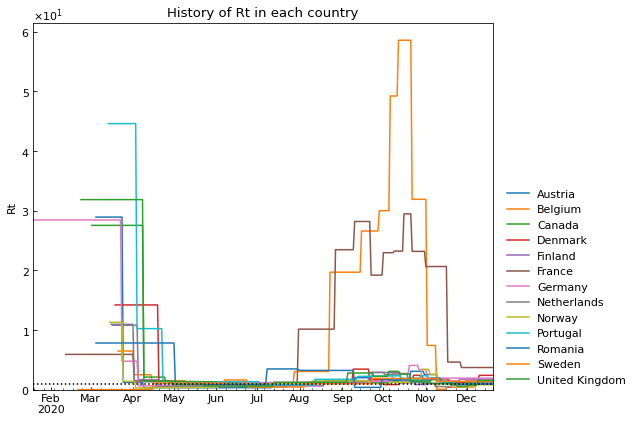

Country,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Netherlands,Norway,Portugal,Romania,Sweden,United Kingdom
Date,,,,,,,,,,,,,
2020-12-16,1.09,1.01,1.19,2.41,1.77,3.72,1.94,1.23,0.83,1.01,0.95,1.39,1.54
2020-12-17,1.09,1.01,1.19,2.41,1.77,3.72,1.94,1.23,0.83,1.01,0.95,1.39,1.54
2020-12-18,1.09,1.01,1.19,2.41,1.77,3.72,1.94,1.23,0.83,1.01,0.95,1.39,1.54
2020-12-19,1.09,1.01,1.19,2.41,1.77,3.72,1.94,1.23,0.83,1.01,0.95,1.39,1.54
2020-12-20,1.09,1.01,1.19,2.41,1.77,3.72,1.94,1.23,0.83,1.01,0.95,1.39,1.54


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

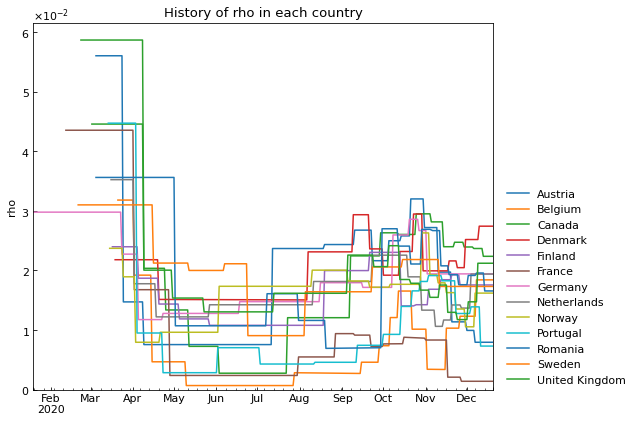

Country,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Netherlands,Norway,Portugal,Romania,Sweden,United Kingdom
Date,,,,,,,,,,,,,
2020-12-16,0.007959,0.018427,0.022378,0.027433,0.01757,0.001414,0.019431,0.0194,0.016206,0.007318,0.016568,0.017324,0.021216
2020-12-17,0.007959,0.018427,0.022378,0.027433,0.01757,0.001414,0.019431,0.0194,0.016206,0.007318,0.016568,0.017324,0.021216
2020-12-18,0.007959,0.018427,0.022378,0.027433,0.01757,0.001414,0.019431,0.0194,0.016206,0.007318,0.016568,0.017324,0.021216
2020-12-19,0.007959,0.018427,0.022378,0.027433,0.01757,0.001414,0.019431,0.0194,0.016206,0.007318,0.016568,0.017324,0.021216
2020-12-20,0.007959,0.018427,0.022378,0.027433,0.01757,0.001414,0.019431,0.0194,0.016206,0.007318,0.016568,0.017324,0.021216


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

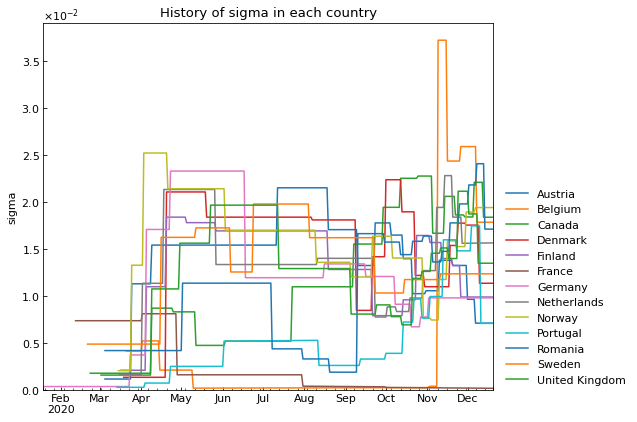

Country,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Netherlands,Norway,Portugal,Romania,Sweden,United Kingdom
Date,,,,,,,,,,,,,
2020-12-16,0.007081,0.017818,0.018348,0.011324,0.009861,0.000152,0.009767,0.015615,0.019375,0.007054,0.017081,0.012327,0.013455
2020-12-17,0.007081,0.017818,0.018348,0.011324,0.009861,0.000152,0.009767,0.015615,0.019375,0.007054,0.017081,0.012327,0.013455
2020-12-18,0.007081,0.017818,0.018348,0.011324,0.009861,0.000152,0.009767,0.015615,0.019375,0.007054,0.017081,0.012327,0.013455
2020-12-19,0.007081,0.017818,0.018348,0.011324,0.009861,0.000152,0.009767,0.015615,0.019375,0.007054,0.017081,0.012327,0.013455
2020-12-20,0.007081,0.017818,0.018348,0.011324,0.009861,0.000152,0.009767,0.015615,0.019375,0.007054,0.017081,0.012327,0.013455


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

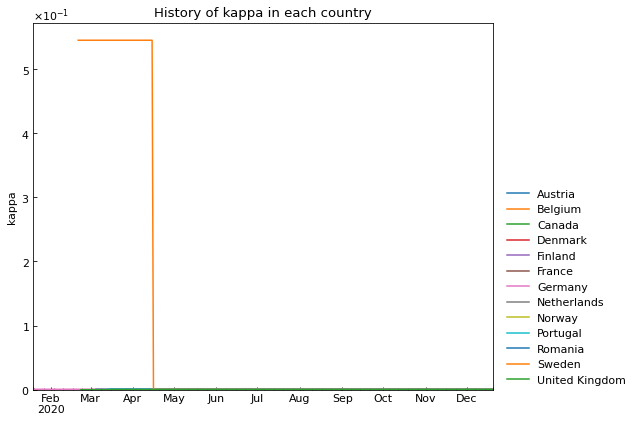

Country,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Netherlands,Norway,Portugal,Romania,Sweden,United Kingdom
Date,,,,,,,,,,,,,
2020-12-16,0.000235,0.000309,0.00004,0.000079,0.000079,0.000002,0.000228,0.000059,0.000192,0.00004,0.000426,0.000096,0.000309
2020-12-17,0.000235,0.000309,0.00004,0.000079,0.000079,0.000002,0.000228,0.000059,0.000192,0.00004,0.000426,0.000096,0.000309
2020-12-18,0.000235,0.000309,0.00004,0.000079,0.000079,0.000002,0.000228,0.000059,0.000192,0.00004,0.000426,0.000096,0.000309
2020-12-19,0.000235,0.000309,0.00004,0.000079,0.000079,0.000002,0.000228,0.000059,0.000192,0.00004,0.000426,0.000096,0.000309
2020-12-20,0.000235,0.000309,0.00004,0.000079,0.000079,0.000002,0.000228,0.000059,0.000192,0.00004,0.000426,0.000096,0.000309


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

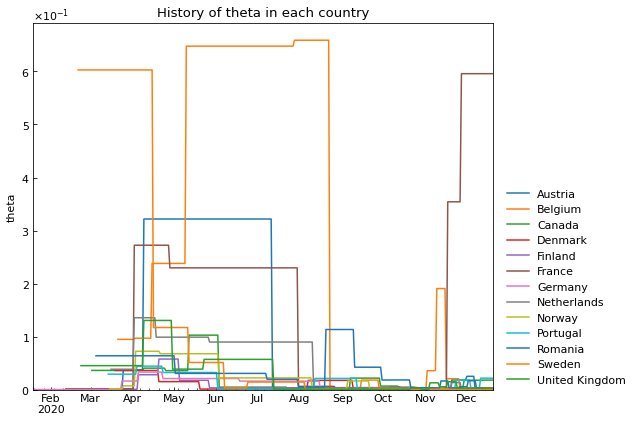

Country,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Netherlands,Norway,Portugal,Romania,Sweden,United Kingdom
Date,,,,,,,,,,,,,
2020-12-16,0.002173,0.003232,0.018152,0.000261,0.000289,0.595738,0.000124,0.002523,0.001212,0.02172,0.000571,0.00051,0.003232
2020-12-17,0.002173,0.003232,0.018152,0.000261,0.000289,0.595738,0.000124,0.002523,0.001212,0.02172,0.000571,0.00051,0.003232
2020-12-18,0.002173,0.003232,0.018152,0.000261,0.000289,0.595738,0.000124,0.002523,0.001212,0.02172,0.000571,0.00051,0.003232
2020-12-19,0.002173,0.003232,0.018152,0.000261,0.000289,0.595738,0.000124,0.002523,0.001212,0.02172,0.000571,0.00051,0.003232
2020-12-20,0.002173,0.003232,0.018152,0.000261,0.000289,0.595738,0.000124,0.002523,0.001212,0.02172,0.000571,0.00051,0.003232


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43012 entries, 0 to 43179
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 43012 non-null  datetime64[ns]
 1   Country                              43012 non-null  object        
 2   Rt                                   43012 non-null  float64       
 3   theta                                43012 non-null  float64       
 4   kappa                                43012 non-null  float64       
 5   rho                                  43012 non-null  float64       
 6   sigma                                43012 non-null  float64       
 7   School_closing                       43012 non-null  int64         
 8   Workplace_closing                    43012 non-null  int64         
 9   Cancel_events                        43012 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.165907,-0.093149,0.451454,-0.563878,-0.212516,-0.230837,-0.322267,-0.332408,-0.157143,-0.133432,-0.054285,-0.308761,-0.212582,-0.233553,-0.117132,-0.303546
theta,-0.165907,1.000000,0.602733,-0.165866,-0.282851,0.058228,0.003142,0.106319,-0.048322,-0.000306,0.153445,0.103768,-0.056287,-0.087624,-0.217432,0.114750,0.026554
kappa,-0.093149,0.602733,1.000000,0.187698,-0.127614,-0.116102,-0.279280,-0.071254,-0.252300,-0.142232,-0.216158,-0.208583,-0.179858,-0.241372,-0.216663,0.044779,-0.242933
rho,0.451454,-0.165866,0.187698,1.000000,-0.043354,-0.265685,-0.366590,-0.315508,-0.557179,-0.277740,-0.358995,-0.396788,-0.508127,-0.316350,-0.379915,-0.254838,-0.431369
sigma,-0.563878,-0.282851,-0.127614,-0.043354,1.000000,0.138661,0.060475,0.164058,0.122581,0.064757,-0.027601,-0.135770,0.099266,0.183260,0.154182,0.059676,0.095025
School_closing,-0.212516,0.058228,-0.116102,-0.265685,0.138661,1.000000,0.651545,0.137010,0.455730,0.111822,0.468640,0.236641,0.290152,0.365759,0.013857,-0.136089,0.746824
Workplace_closing,-0.230837,0.003142,-0.279280,-0.366590,0.060475,0.651545,1.000000,0.364472,0.655435,0.205079,0.657105,0.398869,0.302246,0.429533,0.152128,-0.032077,0.805636
Cancel_events,-0.322267,0.106319,-0.071254,-0.315508,0.164058,0.137010,0.364472,1.000000,0.562441,0.517773,0.422836,0.586159,0.168017,0.432874,-0.055423,-0.044335,0.548117
Gatherings_restrictions,-0.332408,-0.048322,-0.252300,-0.557179,0.122581,0.455730,0.655435,0.562441,1.000000,0.384985,0.530432,0.625356,0.475134,0.587060,0.377306,0.194139,0.777703
Transport_closing,-0.157143,-0.000306,-0.142232,-0.277740,0.064757,0.111822,0.205079,0.517773,0.384985,1.000000,0.426444,0.558649,0.029591,0.282452,-0.067559,-0.069829,0.390153


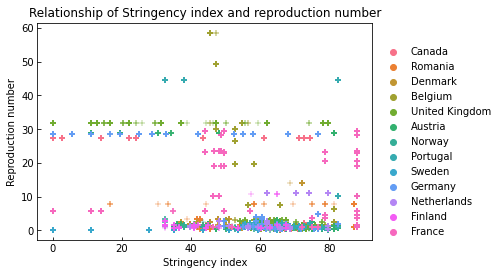

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()